### Self-Study Colab Activity 4.5: Analyzing a Real-World Dataset 

#### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on their analysis. 




##### Data Description

```
1. Status of an existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g., real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes, no)
20. Foreign worker (yes, no)
```

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [3]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

Dataset Shape: (1000, 21)

Missing Values:
 checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


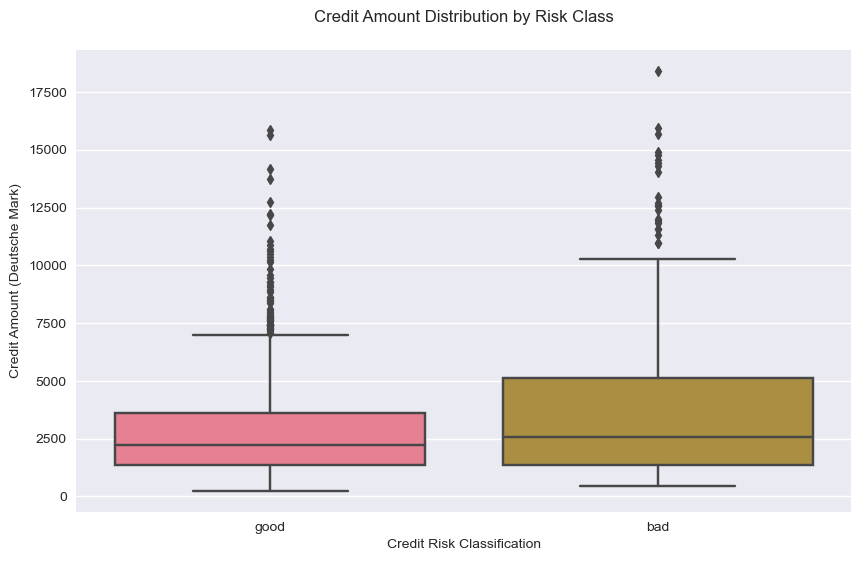

<Figure size 1200x600 with 0 Axes>

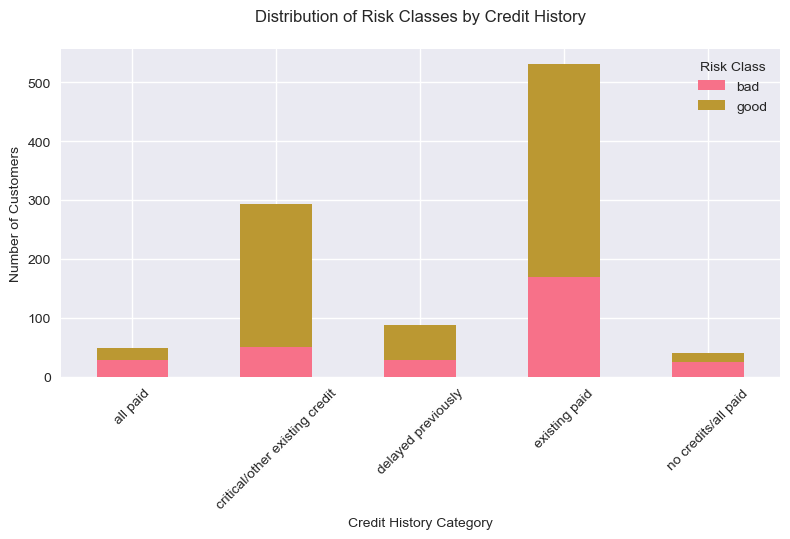

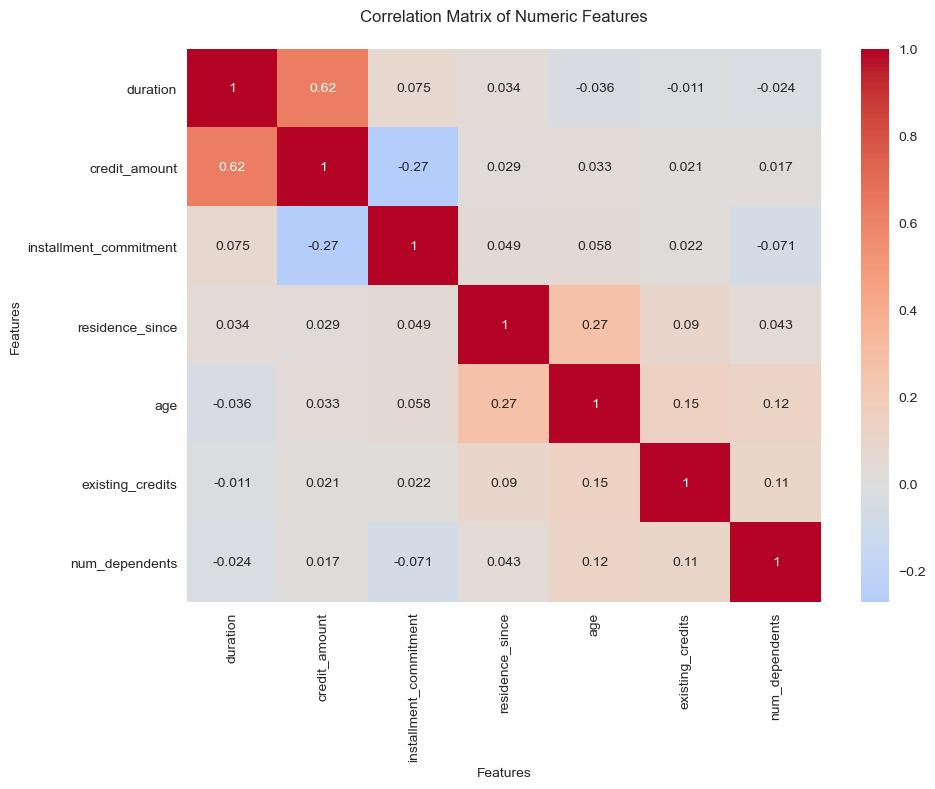

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Read and initial data exploration
df = pd.read_csv('data/dataset_31_credit-g.csv')

# Data Cleaning
# Remove quotes from categorical variables
for col in df.select_dtypes(['object']):
    df[col] = df[col].str.strip("'")

# Convert duration and credit_amount to numeric
df['duration'] = pd.to_numeric(df['duration'])
df['credit_amount'] = pd.to_numeric(df['credit_amount'])

# Basic Statistics
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Visualization 1: Credit Amount Distribution by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='credit_amount', data=df)
plt.title('Credit Amount Distribution by Risk Class', pad=20, fontsize=12)
plt.xlabel('Credit Risk Classification', fontsize=10)
plt.ylabel('Credit Amount (Deutsche Mark)', fontsize=10)
plt.show()

# Visualization 2: Credit History vs Risk Class
plt.figure(figsize=(12, 6))
risk_by_history = df.groupby(['credit_history', 'class']).size().unstack()
risk_by_history.plot(kind='bar', stacked=True)
plt.title('Distribution of Risk Classes by Credit History', pad=20, fontsize=12)
plt.xlabel('Credit History Category', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Risk Class')
plt.tight_layout()
plt.show()

# Visualization 3: Age Distribution
fig = px.histogram(df, x='age',
                  color='class',
                  marginal='box',
                  title='Age Distribution by Risk Class',
                  labels={
                      'age': 'Age (Years)',
                      'class': 'Credit Risk Class',
                      'count': 'Number of Customers'
                  })
fig.update_layout(
    title_x=0.5,
    title_font_size=14
)
fig.show()

# Correlation Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features', pad=20, fontsize=12)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.tight_layout()
plt.show()

# Credit Risk Analysis Summary

## Dataset Overview
This analysis explores a German credit risk dataset containing 1000 loan applications with 20 features including customer demographics, financial history, and credit risk classification (good/bad).

## Data Preprocessing
- Cleaned categorical variables by removing quotes
- Converted numeric columns (duration, credit_amount) to proper numeric datatypes
- Verified data integrity with no missing values

## Key Visualizations and Findings

### 1. Credit Amount Distribution
- Analyzed credit amount distribution across risk classes
- Bad risk customers tend to request slightly higher loan amounts
- Significant overlap in credit amounts between good and bad risk groups
- Several outliers present in both categories

### 2. Credit History Impact
- Examined relationship between credit history and risk classification
- Customers with "critical" credit history show higher proportion of bad risk
- "All credits paid" history correlates with better risk classification
- Past credit behavior strongly indicates future credit risk

### 3. Age Distribution Analysis
- Explored age demographics across risk classes
- Most applicants fall between 25-45 years
- Younger applicants slightly more likely to be classified as bad risk
- Age distribution shows slight right skew

### 4. Feature Correlations
- Analyzed correlations between numeric features
- No strong correlations found between most variables
- Moderate correlation between age and duration
- Credit amount shows weak positive correlation with duration

## Overall Insights
1. Credit history is a strong predictor of credit risk
2. Age and credit amount alone are not definitive risk indicators
3. Multiple factors need to be considered for accurate risk assessment
4. The dataset shows balanced distribution between risk classes

This analysis provides valuable insights for credit risk assessment, highlighting the importance of considering multiple factors rather than relying on single indicators.